# import Libraries

In [1]:
from __future__ import print_function
import os
import csv
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
import pickle
iris = datasets.load_iris()
digits = datasets.load_digits()
import re, string, unicodedata
import html
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

In [2]:
def dictionary(string,label):
    return {'sentence':string,'gender':label}
def WriteRows(dicts):
    with open('gram.csv', 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writerow(dicts)
from __future__ import print_function
import os
with open('gram.csv', 'w', newline='') as csvfile:
    fieldnames = ['sentence','gender']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
path = 'twitter-gender-corpus/male/'
files = os.listdir(path)
for filename in files:
    with  open(f'twitter-gender-corpus/male/{filename}') as f:
        strings  =f.read()
        dicts = dictionary(strings,'Male')
        WriteRows(dicts)
path = 'twitter-gender-corpus/female/'
files = os.listdir(path)
for filename in files:
    with open(f'twitter-gender-corpus/female/{filename}') as f:
        strings  =f.read()
        dicts = dictionary(strings,'Female')
        WriteRows(dicts)

#  Read Data

In [3]:
Data = pd.read_csv('gram.csv')
DataF = pd.DataFrame(Data);
DataF['sentence'] = DataF['sentence'].apply(lambda x: " ".join(re.sub('(http|https)://[a-zA-Z0-9./-]+','',x)  for x in x.split()))
DataF['sentence'] = DataF['sentence'].apply(lambda x: " ".join(html.unescape(x) for x in x.split()))
DataF['sentence'] = DataF['sentence'].apply(lambda x: " ".join(x.lower() for x in x.split()))
DataF['sentence'] = DataF['sentence'].str.replace('[^\w\s]','')
DataF['sentence'] = DataF['sentence'].apply(lambda x: " ".join(re.sub('\d+','',x)  for x in x.split()))
stop = stopwords.words('english')
DataF['sentence'] = DataF['sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [4]:
DataF

,sentence,gender
0,colombia el espectador critica en su editorial...,Male
1,problemática del analista es cuál jugador regi...,Male
2,im centro crece winter comming es talla softsh...,Male
3,research developer job semantic weblinked data...,Male
4,new seo job seo manager british fashion brand ...,Male
5,desengrasante im san telmo w gbonmati si hay q...,Male
6,would call cms brief getting ready first agsm ...,Male
7,yepee first tweet web game engine without flas...,Male
8,wsj big data rise bringing big questions benjr...,Male
9,favorited de howard dean obama maicop slidesha...,Male


# Word 2 gram feature Extraction

In [5]:
corpus =  DataF['sentence'].values
vectorizer = TfidfVectorizer(ngram_range=(2,2),analyzer='word',max_features=1000,)
vectorizer
X = vectorizer.fit_transform(corpus)
#X.shape
X.toarray()


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00387067,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [6]:
column = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
column

,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,youd like,young people,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.137551,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.031474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131864
4,0.0,0.0,0.024537,0.000000,0.056258,0.000777,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597961,0.000000,0.000000
8,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
Data = pd.concat([column, DataF['gender']], axis=1)

In [8]:
Data
Data.to_csv('wordBIGram.csv', sep='\t', encoding='utf-8')

In [9]:
SData = shuffle(Data)
SData

,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,young people,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender
161,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.086109,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Male
369,0.0,0.0,0.000000,0.066418,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.066418,0.015525,0.000000,0.000000,Female
152,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.154564,0.000000,Male
411,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.025329,0.0,0.0,...,0.008646,0.000000,0.000000,0.000000,0.0,0.000000,0.006826,0.006415,0.000000,Female
209,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Male
176,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.029593,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.011242,0.000000,Male
193,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.394793,0.000000,0.000000,Male
181,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Male
86,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.041986,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Male
116,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Male


# Split Data into test and training DataSet

In [10]:
train, test = train_test_split(SData, test_size=0.33)

# Understand Data

In [11]:
train

,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,young people,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender
54,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male
153,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male
273,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female
124,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.003336,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male
77,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.076510,0.0,Male
103,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.003364,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male
184,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male
109,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male
105,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male
143,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male


In [12]:
test

,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,young people,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender
359,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female
89,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male
292,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.146022,0.0,0.0,...,0.000000,0.056132,0.000000,0.000000,0.0,0.000000,0.000000,0.166422,0.0,Female
288,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.106548,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.079054,0.0,Female
321,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.073882,0.000000,0.000000,0.000000,0.0,0.000000,0.058329,0.000000,0.0,Female
390,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female
57,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male
419,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.060523,0.0,0.0,...,0.000000,0.046530,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female
166,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.011254,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male
201,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.039250,0.0,Male


In [13]:
train.columns

Index(['_detailphpid via', 'academic english', 'account manager',
       'added video', 'advertising require', 'air force', 'aka rep',
       'albert einstein', 'aleph blog', 'alex valli',
       ...
       'young people', 'youre going', 'youre welcome', 'youtube check',
       'youtube eurobasket', 'youtube playlist', 'youtube video', 'youve got',
       'youve quoted', 'gender'],
      dtype='object', length=1001)

In [14]:
test.columns

Index(['_detailphpid via', 'academic english', 'account manager',
       'added video', 'advertising require', 'air force', 'aka rep',
       'albert einstein', 'aleph blog', 'alex valli',
       ...
       'young people', 'youre going', 'youre welcome', 'youtube check',
       'youtube eurobasket', 'youtube playlist', 'youtube video', 'youve got',
       'youve quoted', 'gender'],
      dtype='object', length=1001)

In [15]:
print("Number of Instances in train Data = %d"%len(train))
print("Number of Instances in Test Data = %d"%len(test))
print("Number of Instances in Train Data have male gender = %d"%len(train[train["gender"]=="Male"]))
display(train[train["gender"]=="Male"])
print("Number of Instances in Train Data have Female gender = %d"%len(train[train["gender"]=="Female"]))
display(train[train["gender"]=="Female"])

Number of Instances in train Data = 284
Number of Instances in Test Data = 141
Number of Instances in Train Data have male gender = 141


,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,young people,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender
54,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Male
153,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Male
124,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.003336,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Male
77,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.076510,0.0,Male
103,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.003364,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Male
184,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Male
109,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Male
105,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Male
143,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Male
174,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Male


Number of Instances in Train Data have Female gender = 143


,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,young people,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender
273,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female
222,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female
324,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female
245,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female
293,0.0,0.0,0.031163,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female
272,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.039077,0.075499,0.000000,0.0,0.000000,0.000000,0.038619,0.0,Female
334,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.018782,0.0,Female
328,0.0,0.0,0.000000,0.042497,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.042497,0.715197,0.000000,0.0,Female
333,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female
360,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female


In [16]:
print("Number of Instances in Test Data have female gender = %d"%len(test[test["gender"]=="Male"]))
display(test[test["gender"]=="Male"])
print("Number of Instances in Test Data have female gender = %d"%len(test[test["gender"]=="Female"]))
display(test[test["gender"]=="Female"])

Number of Instances in Test Data have female gender = 69


,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,young people,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender
89,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Male
57,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Male
166,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.011254,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Male
201,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039250,0.0,Male
83,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Male
10,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Male
175,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.079372,0.000000,0.000000,0.000000,0.259207,0.000000,0.0,Male
133,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Male
76,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Male
110,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112280,0.0,Male


Number of Instances in Test Data have female gender = 72


,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,young people,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender
359,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Female
292,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.146022,0.0,0.0,...,0.000000,0.056132,0.000000,0.0,0.0,0.000000,0.000000,0.166422,0.0,Female
288,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.106548,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.079054,0.0,Female
321,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.073882,0.000000,0.000000,0.0,0.0,0.000000,0.058329,0.000000,0.0,Female
390,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Female
419,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.060523,0.0,0.0,...,0.000000,0.046530,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Female
256,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Female
247,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.212011,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Female
223,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.051558,0.0,0.0,0.000000,0.000000,0.052746,0.0,Female
299,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,Female


In [17]:
trainDataCount = train.gender.value_counts()
trainDataCount

Female    143
Male      141
Name: gender, dtype: int64

In [18]:
testDataCount = test.gender.value_counts()
testDataCount

Female    72
Male      69
Name: gender, dtype: int64

Text(0.5, 1.0, "Total number of 'Male' & 'Female' in train DataSet")

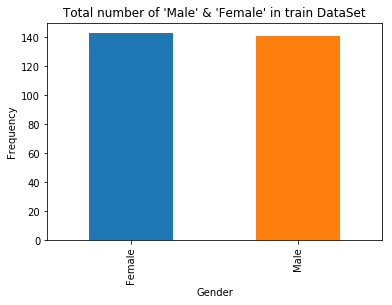

In [19]:
plot = trainDataCount.plot(kind='bar',x='gender')
plot.set_xlabel('Gender')
plot.set_ylabel('Frequency')
plot.set_title("Total number of 'Male' & 'Female' in train DataSet")

Text(0.5, 1.0, "Total number of 'Male' & 'Female' in Test DataSet")

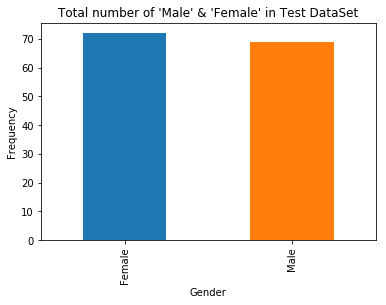

In [20]:
plot = testDataCount.plot(kind='bar',x='gender')
plot.set_xlabel('Gender')
plot.set_ylabel('Frequency')
plot.set_title("Total number of 'Male' & 'Female' in Test DataSet")

# Label Encoding for Train/Test Data

In [21]:
encodeTrainDataSet = train.copy();
encodeTestDataSet = test.copy();
encodeTrainDataSet
len(encodeTrainDataSet)

284

In [22]:
gender_encoder = LabelEncoder();
encodeTrainDataSet.insert(1001,"encoded gender",gender_encoder.fit_transform(encodeTrainDataSet['gender']))
encodeTrainDataSet

,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender,encoded gender
54,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male,1
153,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male,1
273,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female,0
124,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.003336,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male,1
77,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.076510,0.0,Male,1
103,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.003364,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male,1
184,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male,1
109,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male,1
105,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male,1
143,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male,1


In [23]:
gender_encoder = LabelEncoder();
encodeTestDataSet.insert(1001,"encoded gender",gender_encoder.fit_transform(encodeTestDataSet['gender']))
encodeTestDataSet

,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender,encoded gender
359,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female,0
89,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male,1
292,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.146022,0.0,0.0,...,0.056132,0.000000,0.000000,0.0,0.000000,0.000000,0.166422,0.0,Female,0
288,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.079054,0.0,Female,0
321,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.058329,0.000000,0.0,Female,0
390,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female,0
57,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male,1
419,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.060523,0.0,0.0,...,0.046530,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Female,0
166,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.011254,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Male,1
201,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.039250,0.0,Male,1


In [24]:
encodeTrainDataSet['gender'] = encodeTrainDataSet['encoded gender']
encodeTestDataSet['gender'] = encodeTestDataSet['encoded gender']
del(encodeTestDataSet['encoded gender'])
del(encodeTrainDataSet['encoded gender'])

# Train ML Algorithms using Train Data

In [25]:
trainX = encodeTrainDataSet.values[:,:-1]
trainY = encodeTrainDataSet["gender"].values
testX = encodeTestDataSet.values[:,:-1]
testY = encodeTestDataSet["gender"].values
display(trainX)
display(trainY)
display(testX)
display(testY)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1])

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.16642166,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1])

In [26]:
logisticRegression =  LogisticRegression();
logisticRegression.fit(trainX,trainY)
print("parameters and their values");
logisticRegression

parameters and their values


/home/usman/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(trainX,trainY)
print("parameters and their values");
randomForestClassifier

parameters and their values


/home/usman/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
linearSVC=LinearSVC()
linearSVC.fit(trainX,trainY)
print("parameters and their values")
linearSVC

parameters and their values


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [29]:
bernoulliNB =BernoulliNB()
bernoulliNB.fit(trainX,trainY)
print("parameters and their values")
bernoulliNB

parameters and their values


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

# Evaluate ML Algorithms using Test Data

In [30]:
PLRScore = logisticRegression.score(testX,testY)
PLCPridict =  logisticRegression.predict(testX)
test["predicted gender"] = gender_encoder.inverse_transform(PLCPridict)
print("predict using logistic Regression Classifier : ")
print("Accuracy Score : %f"%(PLRScore))

predict using logistic Regression Classifier : 
Accuracy Score : 0.631206


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
RFCScore = randomForestClassifier.score(testX,testY)
RFCPridict =  randomForestClassifier.predict(testX)
test["predicted gender"] = gender_encoder.inverse_transform(RFCPridict)
print("predict using Random Forest Classifier : ")
#display(test)
print("Accuracy Score : %f"%(RFCScore))

predict using Random Forest Classifier : 
Accuracy Score : 0.617021


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
LSVCScore = linearSVC.score(testX,testY)
LSVCPridict =  linearSVC.predict(testX)
test["predicted gender"] = gender_encoder.inverse_transform(LSVCPridict)
print("predict using linearSVC Classifier : ")
#display(test)
print("Accuracy Score : %f"%(LSVCScore))

predict using linearSVC Classifier : 
Accuracy Score : 0.624113


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
BNBScore = bernoulliNB.score(testX,testY)
BNBPridict =  bernoulliNB.predict(testX)
test["predicted gender"] = gender_encoder.inverse_transform(BNBPridict)
print("predict using bernoulliNB Classifier : ")
#display(testData)
print("Accuracy Score : %f"%(BNBScore))

predict using bernoulliNB Classifier : 
Accuracy Score : 0.666667


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Selection of Best Model

In [34]:
predictionModals = {
    'accuracy':[PLRScore,RFCScore,LSVCScore,BNBScore],
    'Model':['LogisticRegression','RandomForestClassifier','LinearSVC','BernoulliNB']
    
}
prodictionModelDF = pd.DataFrame(predictionModals,columns=['accuracy','Model'])
print("detail performance of all parameters : ")
prodictionModelDF

detail performance of all parameters : 


,accuracy,Model
0,0.631206,LogisticRegression
1,0.617021,RandomForestClassifier
2,0.624113,LinearSVC
3,0.666667,BernoulliNB


In [46]:
print("Best model ")
prodictionModelDF.iloc[3:4,:]

Best model 


,accuracy,Model
3,0.666667,BernoulliNB


# APPLICATION PHASE

## Combine Data

In [47]:
encodeTestDataSet

,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,young people,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender
359,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0
89,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
292,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.146022,0.0,0.0,...,0.000000,0.056132,0.000000,0.000000,0.0,0.000000,0.000000,0.166422,0.0,0
288,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.106548,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.079054,0.0,0
321,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.073882,0.000000,0.000000,0.000000,0.0,0.000000,0.058329,0.000000,0.0,0
390,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0
57,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
419,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.060523,0.0,0.0,...,0.000000,0.046530,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0
166,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.011254,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
201,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.039250,0.0,1


In [48]:
encodeTrainDataSet

,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,young people,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender
54,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
153,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
273,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0
124,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.003336,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
77,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.076510,0.0,1
103,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.003364,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
184,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
109,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
105,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
143,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1


In [49]:
combineData = pd.concat([encodeTrainDataSet,encodeTestDataSet])
combineData

,_detailphpid via,academic english,account manager,added video,advertising require,air force,aka rep,albert einstein,aleph blog,alex valli,...,young people,youre going,youre welcome,youtube check,youtube eurobasket,youtube playlist,youtube video,youve got,youve quoted,gender
54,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1
153,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1
273,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0
124,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.003336,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1
77,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.076510,0.0,1
103,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.003364,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1
184,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1
109,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1
105,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1
143,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1


# Train Best Model on All Data

In [50]:
CDX = combineData.values[:,:-1]
CDY = combineData["gender"].values
bernoulliNB =BernoulliNB()
bernoulliNB.fit(CDX,CDY)
print("parameters and their values")
bernoulliNB

parameters and their values


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [51]:
pickle.dump(bernoulliNB,open('wordBIGramModel4Gender','wb'))

# Make Predictions on Unseen/New Data

In [52]:
def dictionary(string):
    return {'sentence':string}
def WriteRows(dicts):
    with open('unseen.csv', 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writerow(dicts)
from __future__ import print_function
import os
with open('unseen.csv', 'w', newline='') as csvfile:
    fieldnames = ['sentence']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
with  open(f'unseen.txt') as f:
    strings  =f.read()
    dicts = dictionary(strings)
    WriteRows(dicts)

In [53]:
UData = pd.read_csv('unseen.csv')
UDataF = pd.DataFrame(UData);
UDataF['sentence'] = UDataF['sentence'].apply(lambda x: " ".join(re.sub('(http|https)://[a-zA-Z0-9./-]+','',x)  for x in x.split()))
UDataF['sentence'] = UDataF['sentence'].apply(lambda x: " ".join(html.unescape(x) for x in x.split()))
UDataF['sentence'] = UDataF['sentence'].apply(lambda x: " ".join(x.lower() for x in x.split()))
UDataF['sentence'] = UDataF['sentence'].str.replace('[^\w\s]','')
UDataF['sentence'] = UDataF['sentence'].apply(lambda x: " ".join(re.sub('\d+','',x)  for x in x.split()))
Ustop = stopwords.words('english')
UDataF['sentence'] = UDataF['sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [54]:
corpus =  UDataF['sentence'].values
X = vectorizer.fit_transform(corpus)
X.toarray()


array([[0.03739788, 0.04986384, 0.04986384, 0.04986384, 0.03739788,
        0.03739788, 0.07479576, 0.03739788, 0.03739788, 0.03739788,
        0.04986384, 0.03739788, 0.0623298 , 0.04986384, 0.19945536,
        0.0623298 , 0.04986384, 0.03739788, 0.03739788, 0.04986384,
        0.03739788, 0.02493192, 0.02493192, 0.02493192, 0.02493192,
        0.02493192, 0.02493192, 0.02493192, 0.02493192, 0.02493192,
        0.02493192, 0.02493192, 0.04986384, 0.02493192, 0.02493192,
        0.08726172, 0.02493192, 0.02493192, 0.02493192, 0.02493192,
        0.02493192, 0.02493192, 0.02493192, 0.02493192, 0.02493192,
        0.02493192, 0.02493192, 0.02493192, 0.02493192, 0.02493192,
        0.02493192, 0.02493192, 0.02493192, 0.02493192, 0.0623298 ,
        0.02493192, 0.02493192, 0.08726172, 0.02493192, 0.02493192,
        0.02493192, 0.02493192, 0.02493192, 0.11219364, 0.02493192,
        0.0623298 , 0.02493192, 0.02493192, 0.02493192, 0.02493192,
        0.02493192, 0.02493192, 0.02493192, 0.02

In [55]:
Ucolumn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
Ucolumn

,actually play,agent doug,already seen,anfieldakiba realoviedowfc,another twitter,anyway lol,basstunedtored lfcts,believe borini,betting advert,brendan got,...,west ham,whats happened,wisdom coates,world class,would get,would put,would said,year old,years ago,zizouology people
0,0.037398,0.049864,0.049864,0.049864,0.037398,0.037398,0.074796,0.037398,0.037398,0.037398,...,0.037398,0.037398,0.037398,0.037398,0.049864,0.037398,0.037398,0.037398,0.037398,0.024932


In [56]:
loadModelData = pickle.load(open('wordBIGramModel4Gender','rb'))
unseenPredictOutput = loadModelData.predict(Ucolumn)
gender_encoder.inverse_transform(unseenPredictOutput)

array(['Male'], dtype=object)